=== Classification Report ===
              precision    recall  f1-score   support

    Preictal       0.90      0.92      0.91    209715
       Ictal       0.92      0.89      0.91    209715

    accuracy                           0.91    419430
   macro avg       0.91      0.91      0.91    419430
weighted avg       0.91      0.91      0.91    419430

=== Confusion Matrix ===


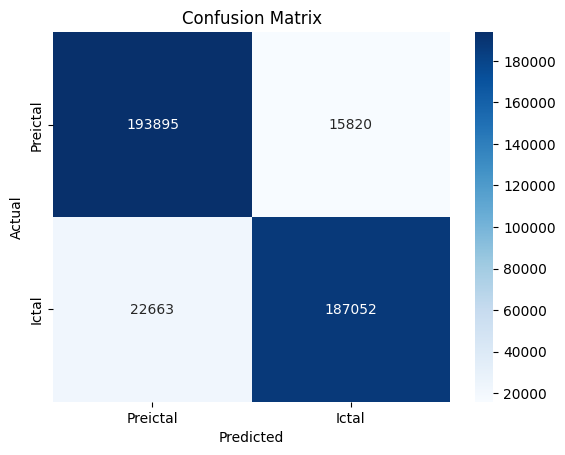

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data
file_path = r"C:\Users\Narula\Downloads\chbmit_preprocessed_data.csv"
df = pd.read_csv(file_path)

# 2. Feature/Label Separation
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# 3. Train/Test Split (80% training, 20% verification)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 5. Predictions
y_pred = rf.predict(X_test)

# 6. Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 7. Results
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Preictal", "Ictal"]))

print("=== Confusion Matrix ===")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Preictal", "Ictal"], yticklabels=["Preictal", "Ictal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
